In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from scipy import interpolate # 보간법 - 결측치 처리

In [78]:
min_max_scaler = preprocessing.MinMaxScaler()

In [79]:
RUL_04 = pd.read_csv('../behrad3d/nasa-cmaps/versions/1/CMaps/RUL_FD001.txt', header=None, sep=' ')
train_04_raw = pd.read_csv('../behrad3d/nasa-cmaps/versions/1/CMaps/train_FD001.txt', header=None, sep=' ').dropna(axis=1)
test_04_raw = pd.read_csv('../behrad3d/nasa-cmaps/versions/1/CMaps/test_FD001.txt', header=None, sep=' ').dropna(axis=1)

col_names = ['unit', 'cycle', 'setting_1', 'setting_2', 'setting_3', 'T2', 'T24', 'T30', 'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32']

train_04_raw.columns = col_names
test_04_raw.columns = col_names

In [80]:
train_04_np = np.loadtxt('../behrad3d/nasa-cmaps/versions/1/CMaps/train_FD004.txt')
train_04_np, train_04_np.shape

(array([[1.00000e+00, 1.00000e+00, 4.20049e+01, ..., 1.00000e+02,
         1.06200e+01, 6.36700e+00],
        [1.00000e+00, 2.00000e+00, 2.00020e+01, ..., 1.00000e+02,
         2.43700e+01, 1.46552e+01],
        [1.00000e+00, 3.00000e+00, 4.20038e+01, ..., 1.00000e+02,
         1.04800e+01, 6.42130e+00],
        ...,
        [2.49000e+02, 2.53000e+02, 2.90000e-03, ..., 1.00000e+02,
         3.97800e+01, 2.38270e+01],
        [2.49000e+02, 2.54000e+02, 3.50046e+01, ..., 1.00000e+02,
         1.52600e+01, 9.07740e+00],
        [2.49000e+02, 2.55000e+02, 4.20030e+01, ..., 1.00000e+02,
         1.06600e+01, 6.43410e+00]]),
 (61249, 26))

In [81]:
train_04_raw.iloc[:, 2:] = min_max_scaler.fit_transform(train_04_raw.iloc[:, 2:])
test_04_raw.iloc[:, 2:] = min_max_scaler.transform(test_04_raw.iloc[:, 2:])

In [82]:
train_04_raw

,unit,cycle,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.633262,0.205882,0.199608,0.363986,0.0,0.333333,0,0.0,0.713178,0.724662
1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.765458,0.279412,0.162813,0.411312,0.0,0.333333,0,0.0,0.666667,0.731014
2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.795309,0.220588,0.171793,0.357445,0.0,0.166667,0,0.0,0.627907,0.621375
3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.889126,0.294118,0.174889,0.166603,0.0,0.333333,0,0.0,0.573643,0.662386
4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.746269,0.235294,0.174734,0.402078,0.0,0.416667,0,0.0,0.589147,0.704502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,0.477011,0.250000,0.0,0.0,0.686747,0.587312,0.782917,0.0,...,0.170576,0.558824,0.194344,0.656791,0.0,0.750000,0,0.0,0.271318,0.109500
20627,100,197,0.408046,0.083333,0.0,0.0,0.701807,0.729453,0.866475,0.0,...,0.211087,0.500000,0.188668,0.727203,0.0,0.583333,0,0.0,0.124031,0.366197
20628,100,198,0.522989,0.500000,0.0,0.0,0.665663,0.684979,0.775321,0.0,...,0.281450,0.529412,0.212148,0.922278,0.0,0.833333,0,0.0,0.232558,0.053991
20629,100,199,0.436782,0.750000,0.0,0.0,0.608434,0.746021,0.747468,0.0,...,0.208955,0.514706,0.203065,0.823394,0.0,0.583333,0,0.0,0.116279,0.234466


In [83]:
train_04_raw.columns

Index(['unit', 'cycle', 'setting_1', 'setting_2', 'setting_3', 'T2', 'T24',
       'T30', 'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi',
       'NRf', 'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31',
       'W32'],
      dtype='object')

In [84]:
train_04_nor = train_04_raw
test_04_nor = test_04_raw
    
train_04_nor = train_04_nor.drop(columns=['T2', 'P2', 'P15', 'epr', 'farB', 'Nf_dmd', 'PCNfR_dmd'])
test_04_nor = test_04_nor.drop(columns=['T2', 'P2', 'P15', 'epr', 'farB', 'Nf_dmd', 'PCNfR_dmd'])

In [85]:
max_RUL = 150.0 # RUL의 최대값 설정
winSize = 30 # 윈도우 크기 설정
trainX = []
trainY = []
testX = []
testY = []

regr = linear_model.LinearRegression() # feature extraction of two features - 번역: 두 가지 특징의 특징 추출

In [86]:
# 특징 추출 함수
def fea_extract(data): # feature extraction of two features - 번역: 두 가지 특징의 특징 추출
    fea = []
    print(data.shape)
    x = np.array(range(data.shape[0])) # x축
    for i in range(data.shape[1]): # 각 센서별
        fea.append(np.mean(data[:, i])) # 평균
        regr.fit(x.reshape(-1, 1), np.ravel(data[:, i])) # 선형회귀 적합
        # np.ravel(): 다차원 배열을 1차원 배열로 변환
        return fea

In [87]:
# 학습 데이터 윈도우 생성
trainInd = []
testLen = []

for i in range(1, train_04_nor['unit'].max()+1): # 각 유닛별로
    ind = np.where(train_04_nor['unit'] == i) # 각 유닛의 인덱스 ex) 유닛 1의 인덱스
    ind = ind[0]
    data_temp = train_04_nor.iloc[ind, :]
    for j in range(len(data_temp) - winSize+1):
        trainX.append(data_temp.iloc[j:j+winSize, 2:]) # 설정변수, 센서값 / unit, cycle 제외
        train_RUL = len(data_temp) - winSize - j
        if train_RUL > max_RUL: # RUL이 최대값보다 크면 최대값으로 설정
            train_RUL = max_RUL
        trainY.append(train_RUL)

In [88]:
# 테스트 데이터 윈도우 생성
for i in range(1, test_04_nor['unit'].max()+1):
    ind = np.where(test_04_nor['unit'] == i)
    ind = ind[0]
    testLen.append(len(ind))
    data_temp = test_04_nor.iloc[ind, :]

    if len(data_temp) < winSize: # 데이터 길이가 윈도우 크기보다 작으면 패딩 추가
        data_temp_a = []
        for myi in range(data_temp.shape[1]): # 각 컬럼별로
            x1 = np.linspace(0, winSize-1, len(data_temp)) # 원래 데이터의 x축
            x_new = np.linspace(0, winSize-1, winSize) # 보간 후의 x축
            tck = interpolate.splrep(x1, data_temp.iloc[:,myi]) # 스플라인 보간법 적용
            a = interpolate.splev(x_new, tck) # 보간된 값 계산
            data_temp_a.append(a.tolist())
        data_temp_a = np.array(data_temp_a)
        data_temp = data_temp_a.T
        data_temp = data_temp[:, 2:] # unit, cycle 제외
    else:
        data_temp = data_temp.iloc[-winSize:, 2:] # duration이 윈도우 크기 이상이면 마지막 윈도우 선택

    data_temp = np.reshape(data_temp, (1, data_temp.shape[0], data_temp.shape[1]))

    if i == 1:
        testX = data_temp # 첫 번째 유닛일 때
    else: # 두 번째 유닛부터는 이어붙이기
        testX = np.vstack((testX, data_temp))
    if RUL_04.iloc[i-1, 0] > max_RUL: # RUL이 최대값보다 크면 최대값으로 설정
        testY.append(max_RUL)
    else:
        testY.append(RUL_04.iloc[i-1, 0])

In [89]:
trainX = np.array(trainX)
testX = np.array(testX)

trainY = np.array(trainY) / max_RUL # RUL 정규화

trainX_fea = []
testX_fea = []

# 특징 추출 적용
for i in range(len(trainX)):
    data_temp = trainX[i]
    trainX_fea.append(fea_extract(data_temp))

for i in range(len(testX)):
    data_temp = testX[i]
    testX_fea.append(fea_extract(data_temp))

scale = preprocessing.StandardScaler().fit(trainX_fea)
trainX_fea = scale.transform(trainX_fea)
testX_fea = scale.transform(testX_fea)

(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(30, 17)
(

In [90]:
########################### training and testing (PyTorch) ######################

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import time
import numpy as np
import scipy.io as scio
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# 재현성 고정
np.random.seed(7)
torch.manual_seed(7)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(7)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- 하이퍼파라미터 (원본에서 가져옴)
batch_size = 100
nb_epoch = 30
nb_runs = 5
lstm_units = 50
dropout_rate = 0.2
SINGLE_ATTENTION_VECTOR = False
APPLY_ATTENTION_BEFORE_LSTM = False

# 환경에 기존 변수들이 존재한다고 가정합니다 (원본 코드와 동일)
# trainData, trainX_fea, trainTarget, testData, testX_fea, testTarget, max_RUL
# 형태:
# trainData: (N_train, TIME_STEPS, INPUT_DIM)
# trainX_fea: (N_train, num_fea)
# trainTarget: (N_train,)    -- 원본은 정규화된 상태로 다루는 것으로 가정
# testTarget: (N_test,)      -- 원본은 실제 단위로 사용된 것으로 가정

TIME_STEPS = trainX.shape[1]
INPUT_DIM = trainX.shape[2]
FEA_DIM = trainX_fea.shape[1]


# --- 원본의 custom score를 그대로 구현
def myScore(y_true, y_pred):
    score = 0.0
    for i in range(len(y_pred)):
        if y_true[i] <= y_pred[i]:
            score += np.exp(-(y_true[i] - y_pred[i]) / 10.0) - 1.0
        else:
            score += np.exp((y_true[i] - y_pred[i]) / 13.0) - 1.0
    return score


# --- Attention 블록을 nn.Module로 구현
class Attention3dBlock(nn.Module):
    """
    Keras 버전의 attention_3d_block 동작을 재현합니다.
    입력: x shape (B, T, D)
    처리:
      - 순서 변경(permute) -> (B, D, T)
      - 마지막 차원(T)에 대해 Linear 적용 (T -> T)
      - 시간축에 대해 softmax 적용
      - SINGLE_ATTENTION_VECTOR 옵션 시 D축 평균 후 반복
      - 다시 순서 복원 (B, T, D) 후 입력과 곱셈
    """
    def __init__(self, time_steps, input_dim, single_vector=False):
        super().__init__()
        self.time_steps = time_steps
        self.input_dim = input_dim
        self.single_vector = single_vector
        # time_steps -> time_steps 매핑을 위한 Linear 레이어
        self.fc = nn.Linear(time_steps, time_steps, bias=True)

    def forward(self, x):
        # x: (B, T, D)
        B, T, D = x.size()
        # (B, D, T)로 치환
        a = x.permute(0, 2, 1).contiguous()  # (B, D, T)
        # Linear를 적용하기 위해 첫 두 차원을 펼침
        a_flat = a.view(-1, self.time_steps)  # (B*D, T)
        a_trans = self.fc(a_flat)  # (B*D, T)
        a_trans = a_trans.view(B, D, T)
        # 시간축 기준 softmax
        a_soft = F.softmax(a_trans, dim=2)  # (B, D, T)
        if self.single_vector:
            # D 축 평균 -> (B,1,T) -> (B,D,T)로 반복
            a_mean = a_soft.mean(dim=1, keepdim=True)  # (B,1,T)
            a_soft = a_mean.repeat(1, D, 1)  # (B,D,T)
        # 다시 (B, T, D)로 치환
        a_soft = a_soft.permute(0, 2, 1).contiguous()  # (B, T, D)
        # 입력과 element-wise 곱
        out = x * a_soft
        return out


# --- 모델 정의 (두 가지 변형: LSTM 후/전 Attention)
class ModelAttentionAfterLSTM(nn.Module):
    def __init__(self, time_steps, input_dim, fea_dim, lstm_units=50, dropout_rate=0.2):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, lstm_units, batch_first=True)
        self.att = Attention3dBlock(time_steps=time_steps, input_dim=lstm_units, single_vector=SINGLE_ATTENTION_VECTOR)
        # flatten 이후 처리
        self.flatten_dim = time_steps * lstm_units
        self.fc1 = nn.Linear(self.flatten_dim, 50)
        self.drop1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(50, 10)
        # 추가 특징(branch)
        self.fea_fc = nn.Linear(fea_dim, 10)  # 원본의 densefea2(Dense(10))
        # 병합 후 처리
        self.merge_fc = nn.Linear(10 + 10, 10)
        self.drop2 = nn.Dropout(dropout_rate)
        self.out_fc = nn.Linear(10, 1)

    def forward(self, seq_x, fea_x):
        # seq_x: (B, T, input_dim), fea_x: (B, fea_dim)
        lstm_out, _ = self.lstm(seq_x)  # (B, T, lstm_units)
        att_out = self.att(lstm_out)  # (B, T, lstm_units)
        # att_out may be non-contiguous after element-wise ops; use reshape (or contiguous().view)
        flat = att_out.reshape(att_out.size(0), -1)  # (B, T*lstm_units)
        d = F.relu(self.fc1(flat))
        d = self.drop1(d)
        d = F.relu(self.fc2(d))
        fea = F.relu(self.fea_fc(fea_x))
        merged = torch.cat([d, fea], dim=1)
        merged = F.relu(self.merge_fc(merged))
        merged = self.drop2(merged)
        out = self.out_fc(merged)
        return out.squeeze(1)


class ModelAttentionBeforeLSTM(nn.Module):
    def __init__(self, time_steps, input_dim, fea_dim, lstm_units=50, dropout_rate=0.2):
        super().__init__()
        # 원본 입력에 attention 적용
        self.att = Attention3dBlock(time_steps=time_steps, input_dim=input_dim, single_vector=SINGLE_ATTENTION_VECTOR)
        self.lstm = nn.LSTM(input_dim, lstm_units, batch_first=True)
        self.fc0 = nn.Linear(lstm_units, 50)
        self.drop1 = nn.Dropout(dropout_rate)
        self.fc1 = nn.Linear(50, 10)
        # 추가 특징(branch)
        self.fea_fc1 = nn.Linear(fea_dim, 50)
        self.fea_drop = nn.Dropout(dropout_rate)
        self.fea_fc2 = nn.Linear(50, 10)
        # 병합 후 처리
        self.merge_fc = nn.Linear(10 + 10, 10)
        self.drop2 = nn.Dropout(dropout_rate)
        self.out_fc = nn.Linear(10, 1)

    def forward(self, seq_x, fea_x):
        att_in = self.att(seq_x)  # (B, T, input_dim)
        lstm_out, _ = self.lstm(att_in)  # 모든 타임스텝 출력
        # Keras의 return_sequences=False와 동일하게 마지막 타임스텝을 사용
        last = lstm_out[:, -1, :]  # (B, lstm_units)
        d = F.relu(self.fc0(last))
        d = self.drop1(d)
        d = F.relu(self.fc1(d))
        fea = F.relu(self.fea_fc1(fea_x))
        fea = self.fea_drop(fea)
        fea = F.relu(self.fea_fc2(fea))
        merged = torch.cat([d, fea], dim=1)
        merged = F.relu(self.merge_fc(merged))
        merged = self.drop2(merged)
        out = self.out_fc(merged)
        return out.squeeze(1)


# --- Dataset 래퍼
class SequenceWithFeaDataset(Dataset):
    def __init__(self, seq_array, fea_array, target_array):
        # 입력이 list일 수도 있으므로 안전하게 numpy array로 변환하고 float32로 설정
        self.X = np.asarray(seq_array, dtype=np.float32)
        self.F = np.asarray(fea_array, dtype=np.float32)
        self.y = np.asarray(target_array, dtype=np.float32)

        # 안전 처리: 세 입력의 길이가 불일치할 경우 가장 짧은 길이에 맞춰 자릅니다.
        # (원래는 불일치가 있으면 IndexError 발생 가능)
        lenX = len(self.X)
        lenF = len(self.F)
        lenY = len(self.y)
        min_len = min(lenX, lenF, lenY)
        if not (lenX == lenF == lenY):
            # 간단한 경고 출력 및 잘라내기
            print(f"Warning: Dataset length mismatch detected (X:{lenX}, F:{lenF}, y:{lenY}). Truncating to {min_len}.")
            self.X = self.X[:min_len]
            self.F = self.F[:min_len]
            self.y = self.y[:min_len]

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.F[idx], self.y[idx]


# --- 학습/평가 헬퍼 함수
def evaluate_model(model, loader):
    model.eval()
    preds = []
    trues = []
    with torch.no_grad():
        for Xb, Fb, yb in loader:
            Xb = Xb.to(device)
            Fb = Fb.to(device)
            out = model(Xb, Fb)
            out_np = out.detach().cpu().numpy()
            preds.append(out_np)
            trues.append(yb.numpy())
    preds = np.concatenate(preds, axis=0)
    trues = np.concatenate(trues, axis=0)
    return preds, trues


# --- 메인 루프 (원본 동작을 최대한 보존)
train_ds = SequenceWithFeaDataset(trainX, trainX_fea, trainY)
test_ds = SequenceWithFeaDataset(testX, testX_fea, testY)

train_loader_full = DataLoader(train_ds, batch_size=batch_size, shuffle=True, drop_last=False)
train_loader_eval = DataLoader(train_ds, batch_size=256, shuffle=False)
test_loader = DataLoader(test_ds, batch_size=256, shuffle=False)

for run_i in range(nb_runs):
    print("iteration:", run_i)
    if APPLY_ATTENTION_BEFORE_LSTM:
        model = ModelAttentionBeforeLSTM(time_steps=TIME_STEPS, input_dim=INPUT_DIM, fea_dim=FEA_DIM,
                                         lstm_units=lstm_units, dropout_rate=dropout_rate)
    else:
        model = ModelAttentionAfterLSTM(time_steps=TIME_STEPS, input_dim=INPUT_DIM, fea_dim=FEA_DIM,
                                        lstm_units=lstm_units, dropout_rate=dropout_rate)

    model = model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
    criterion = nn.MSELoss()

    # 에포크 단위 로깅 (원본 EpochAccuracy를 모사)
    train_losses = []
    val_losses = []
    train_scores = []
    val_scores = []

    for epoch in range(nb_epoch):
        model.train()
        epoch_losses = []
        for Xb, Fb, yb in train_loader_full:
            Xb = Xb.to(device)
            Fb = Fb.to(device)
            yb = yb.to(device)
            optimizer.zero_grad()
            out = model(Xb, Fb)  # 모델의 출력 (정규화된 상태 가정)
            loss = criterion(out, yb)
            loss.backward()
            optimizer.step()
            epoch_losses.append(loss.item())
        train_loss_epoch = np.mean(epoch_losses)
        train_losses.append(train_loss_epoch)

        # 에포크 종료 시 평가 수행 (학습 데이터 및 테스트 데이터)
        # 학습 데이터 예측
        train_preds_norm, train_trues_norm = evaluate_model(model, train_loader_eval)
        # 원본과 동일하게 max_RUL을 곱해 실제 단위로 변환
        train_preds_real = train_preds_norm * max_RUL
        train_trues_real = train_trues_norm * max_RUL  # 원본의 trainTarget_nor 재현
        train_mse = mean_squared_error(train_trues_real, train_preds_real)
        train_score = myScore(train_trues_real, train_preds_real)
        train_scores.append(train_score)

        # 테스트 데이터 예측
        test_preds_norm, test_trues = evaluate_model(model, test_loader)
        test_preds_real = test_preds_norm * max_RUL
        # 원본은 testTarget(실제 단위)을 바로 사용
        val_mse = mean_squared_error(test_trues, test_preds_real)
        val_score = myScore(test_trues, test_preds_real)
        val_losses.append(val_mse)
        val_scores.append(val_score)

        print(f"Epoch {epoch+1}/{nb_epoch} - train_loss: {train_loss_epoch:.6f} - train_rmse: {np.sqrt(train_mse):.4f} - train_score: {train_score:.4f} | test_rmse: {np.sqrt(val_mse):.4f} - test_score: {val_score:.4f}")

    # 각 실행(run) 종료 후 최종 평가
    test_preds_norm, test_trues = evaluate_model(model, test_loader)
    test_preds_real = test_preds_norm * max_RUL
    test_rmse = np.sqrt(mean_squared_error(test_trues, test_preds_real))
    test_score = myScore(test_trues, test_preds_real)
    print("lastScore:", test_score, " lastRMSE:", test_rmse)

    # 원본과 동일하게 결과 저장 (results 폴더 생성)
    os.makedirs('results', exist_ok=True)
    scio.savemat(f'results/proposed{run_i+1}_FD004.mat', {'y_true': test_trues, 'y_pred': test_preds_real})

    # GPU 메모리 해제
    del model, optimizer
    torch.cuda.empty_cache()


iteration: 0
Epoch 1/30 - train_loss: 0.197158 - train_rmse: 48.7807 - train_score: 4233940.6159 | test_rmse: 41.8084 - test_score: 20093.3716
Epoch 2/30 - train_loss: 0.085575 - train_rmse: 24.7497 - train_score: 245595.7083 | test_rmse: 20.8501 - test_score: 1337.8182
Epoch 3/30 - train_loss: 0.048484 - train_rmse: 24.3295 - train_score: 201125.2869 | test_rmse: 17.4586 - test_score: 433.1113
Epoch 4/30 - train_loss: 0.039264 - train_rmse: 19.5488 - train_score: 145631.4572 | test_rmse: 18.4166 - test_score: 775.1150
Epoch 5/30 - train_loss: 0.035441 - train_rmse: 18.9301 - train_score: 108894.5430 | test_rmse: 16.4234 - test_score: 599.0374
Epoch 6/30 - train_loss: 0.031178 - train_rmse: 19.7219 - train_score: 110350.7021 | test_rmse: 16.1705 - test_score: 506.9185
Epoch 7/30 - train_loss: 0.029680 - train_rmse: 18.7069 - train_score: 103685.9220 | test_rmse: 16.4214 - test_score: 605.0052
Epoch 8/30 - train_loss: 0.026011 - train_rmse: 18.7421 - train_score: 101471.7911 | test_rmse

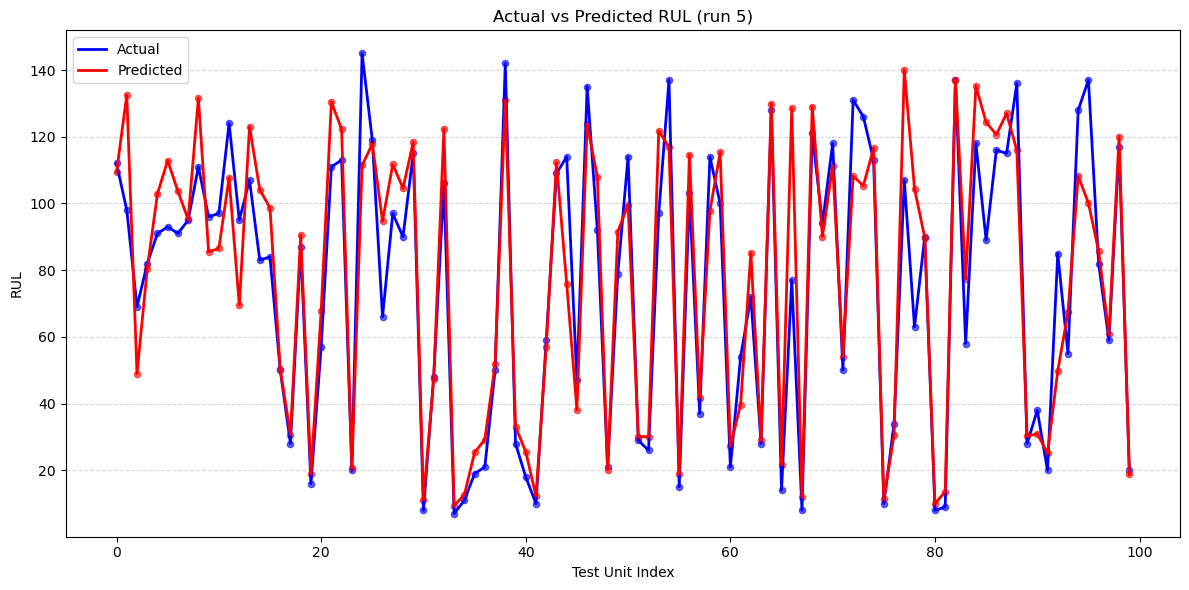

In [94]:
# ...existing code...
scio.savemat(f'results/proposed{run_i+1}_FD004.mat', {'y_true': test_trues, 'y_pred': test_preds_real})

# 시각화: Actual vs Predicted (per-run)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ensure 1D numpy arrays
y_true = np.asarray(test_trues).ravel()
y_pred = np.asarray(test_preds_real).ravel()
x = np.arange(len(y_true))

plt.figure(figsize=(12,6))
ax = plt.gca()
sns.lineplot(x=x, y=y_true, color='blue', label='Actual', linewidth=2, ax=ax)
sns.lineplot(x=x, y=y_pred, color='red', label='Predicted', linewidth=2, ax=ax)
# optional scatter to show points
ax.scatter(x, y_true, color='blue', s=20, alpha=0.6)
ax.scatter(x, y_pred, color='red', s=20, alpha=0.6)
ax.set_xlabel('Test Unit Index')
ax.set_ylabel('RUL')
ax.set_title(f'Actual vs Predicted RUL (run {run_i+1})')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
# ...existing code...

추세를 잘 따르지만 실제보다 수명을 더 길게 예측하는 경향이 있음
고장 전에 보전이 중요하므로 가중치 조정이 필요할 것임.

FD_004는 예측이 어려워서 적용 실패